In [47]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [48]:
def func(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    result = 0
    rel = ( x - mu )/sig
    
    if rel < -1 * alphaL:
        result = AL * (BL - rel)**(-nL)
    elif (rel >= -1 * alphaL) and (rel <= alphaR):
        result = np.exp(-1 * rel**2 / 2)
    elif rel > alphaR:
        result = AR*(BR + rel)**(-nR)
        
    return result * N #/ (np.sqrt(2 * np.pi) * sig)

10.159064728353176


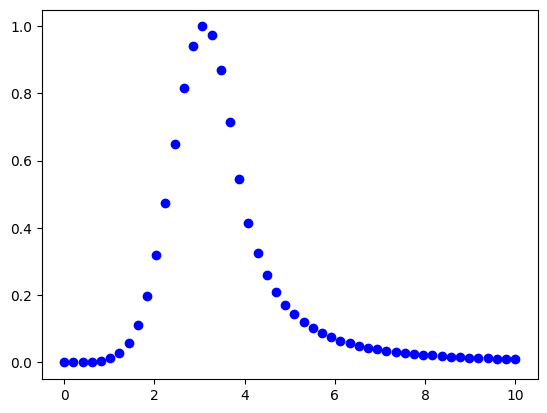

In [49]:
N = 1
mu = 3.1
sig = 0.70
alphaL = 10
alphaR = 1
nL= 3
nR= 3

x = np.linspace(0, 10, 50)
x_data = np.array(x)
y_data = np.array([func(j, N, mu, sig, alphaL, nL, alphaR, nR) for j in x_data])
plt.plot(x, y_data, 'bo')

print(y_data.sum())

In [50]:
print(len(x_data))
print(len(y_data))

#params, covs = curve_fit(func, x_data, y_data) 
#print("params: ", params) 
#print("covariance: \n", covs) 

50
50
